<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft_SOLUTION.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [1]:
""" Import libraries. """
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import pandas as pd

# use seaborn poster v8
plt.style.use('seaborn-v0_8-poster')

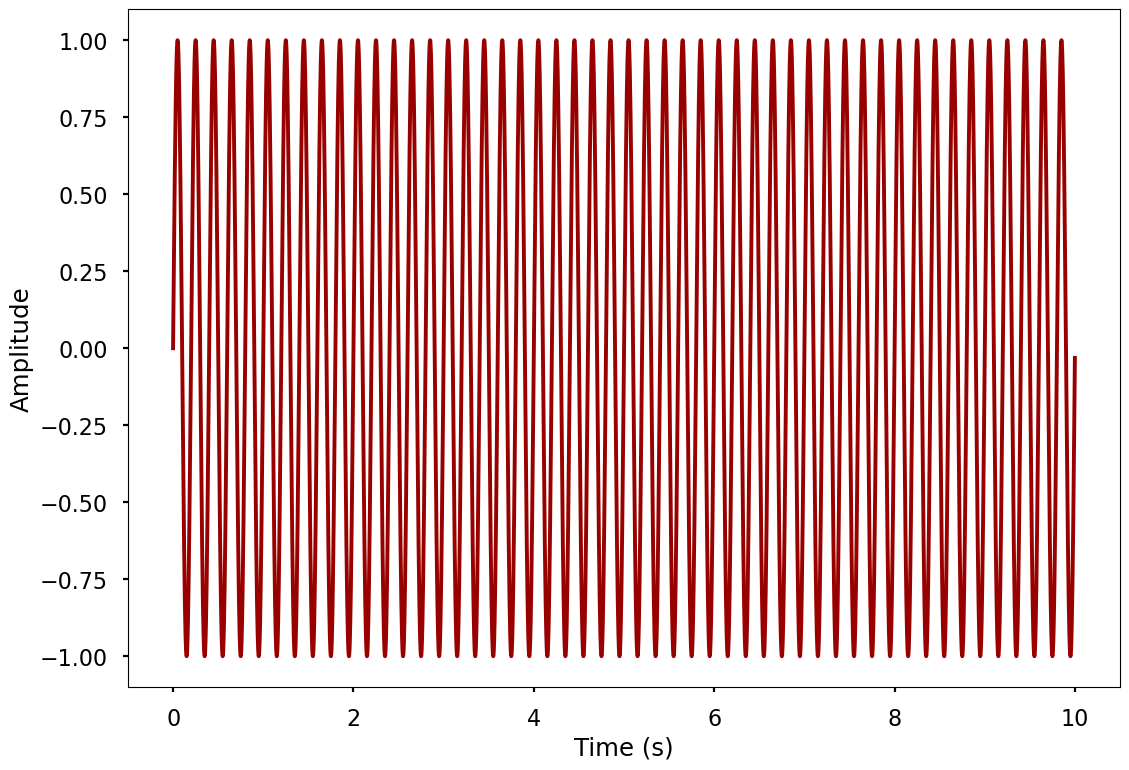

In [2]:
""" Create and plot a test signal. """

frequency = 5 # Hz

# Convert to radians per second
freq_rad = 2*np.pi*frequency # rad/s

# Create a time axis
dt = 0.001 # seconds
t = np.arange(0, 10, dt)

# Create a test signal
y = np.sin(freq_rad*t)

# plot the test signal in the time domain
fig, ax = plt.subplots()

ax.plot(t, y, color = '#990000')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

plt.show()

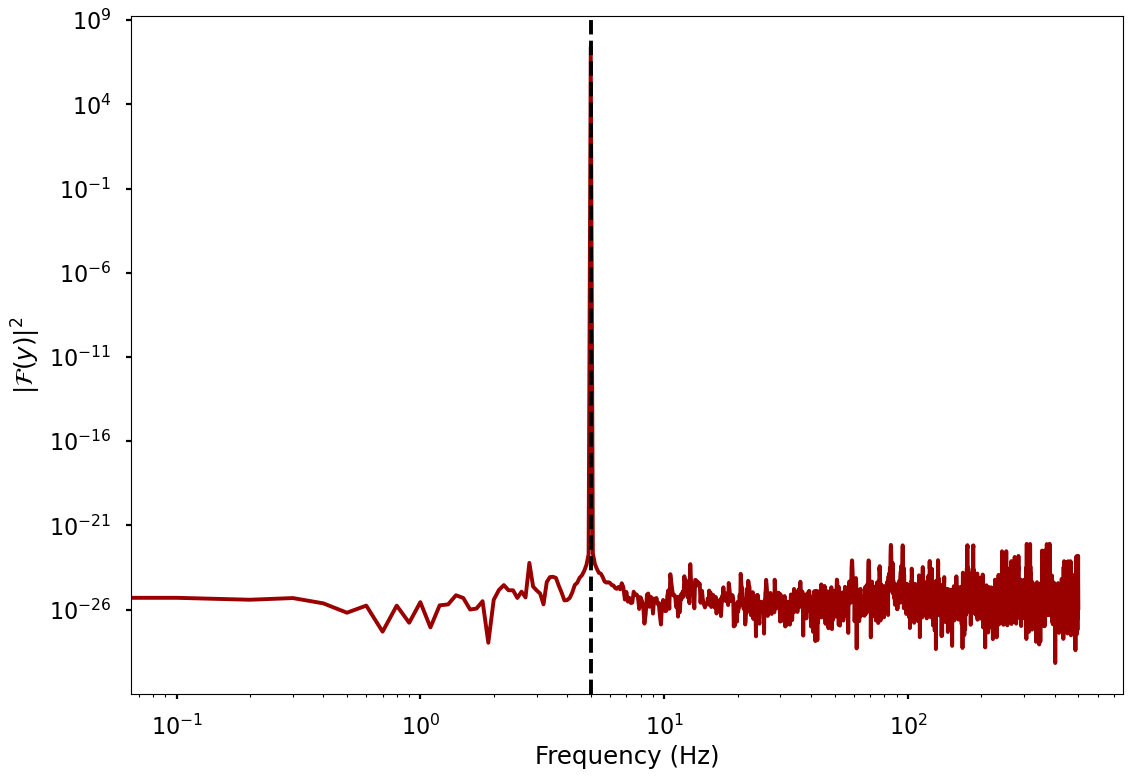

In [3]:
""" Compute the FFT of the test signal. """
# do the FFT
y_fft = fft.rfft(y)

# get the power spectrum from the FFT
y_power = np.abs(y_fft*np.conj(y_fft))

# get the frequencies for the FFT
freqs = fft.rfftfreq(len(y), dt)

# plot the FFT
fig, ax = plt.subplots()
ax.plot(freqs, y_power, color = '#990000')
# make the x-axis logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# add axis labels
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$|\mathcal{F}(y)|^2$')

# plot a line at the frequency of the test signal
ax.axvline(frequency, color = '#000000', linestyle = '--')
plt.show()

In [4]:
""" Make a function to compute the power spectrum of a signal. """
def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    # do the FFT
    y_fft = fft.rfft(y)

    # get the power spectrum from the FFT
    y_power = np.abs(y_fft*np.conj(y_fft))

    # get the frequencies for the FFT
    freqs = fft.rfftfreq(len(y), t[1] - t[0])

    return freqs, y_power

# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    # plot the FFT
    fig, ax = plt.subplots()
    ax.plot(freqs, y_power, color = '#990000')
    # make the x-axis logarithmic
    ax.set_xscale('log')
    ax.set_yscale('log')

    # add axis labels
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('$|\mathcal{F}(y)|^2$')

    return fig, ax


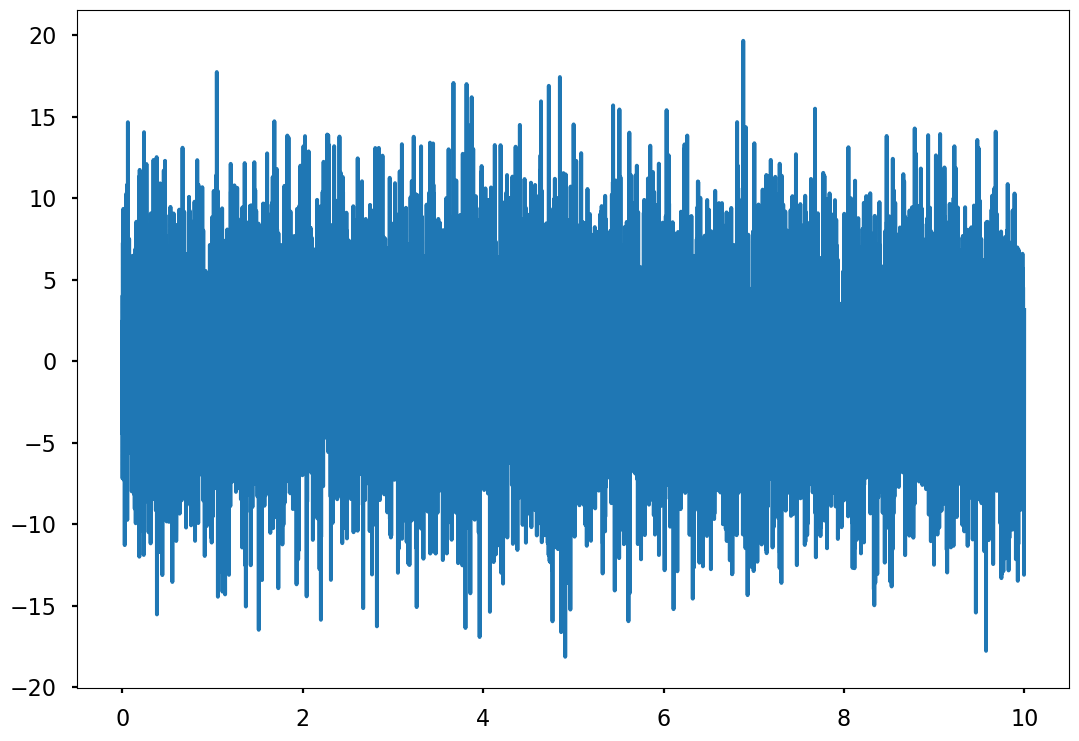

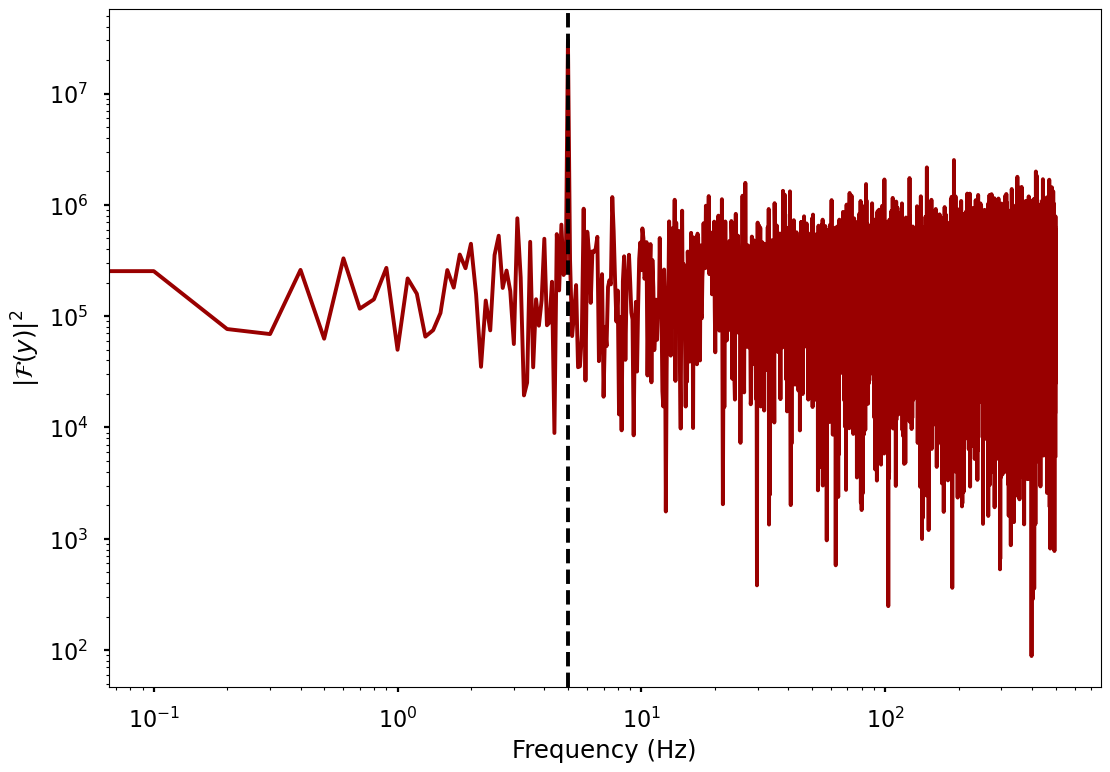

In [5]:
""" Get the power spectrum with noise added. """
# add noise to y
y_noisy = y + np.random.normal(0, 5, len(y))
plt.plot(t, y_noisy)
plt.show()

# get the power spectrum
freqs, y_power = power_spectrum(y_noisy, t)

# plot the power spectrum
fig, ax = plot_power_spectrum(freqs, y_power)


# plot a line at the frequency of the test signal
ax.axvline(frequency, color = '#000000', linestyle = '--')
plt.show()


# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [6]:
""" Load the data file. """
skiprows = 30

# load the data
data = pd.read_csv(
    "cannelton_flow.dat",
    skiprows = skiprows,
    delim_whitespace = True,
    names = ['org', 'id', 'date', 'flow', 'flag'],
    parse_dates=['date'],
    )

data.head()

,org,id,date,flow,flag
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


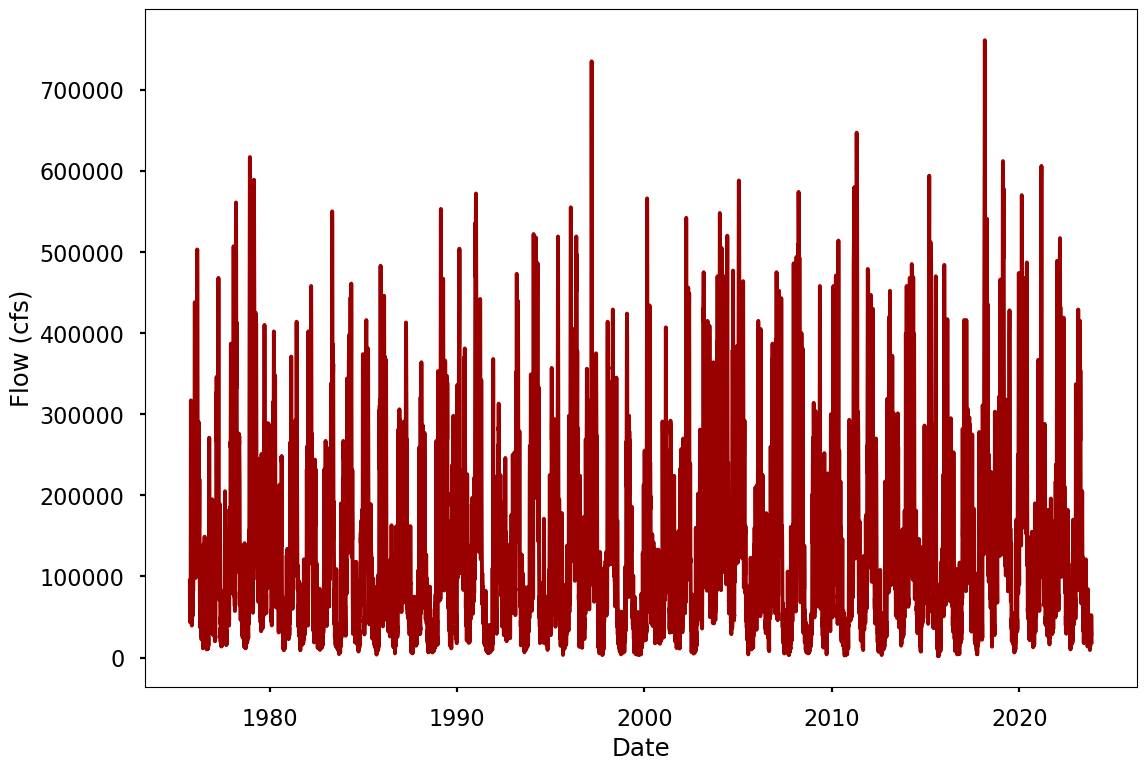

In [7]:
""" Plot a time series of the data. """
fig, ax = plt.subplots()
ax.plot(data['date'], data['flow'], color = '#990000')
ax.set_xlabel('Date')
ax.set_ylabel('Flow (cfs)')
plt.show()


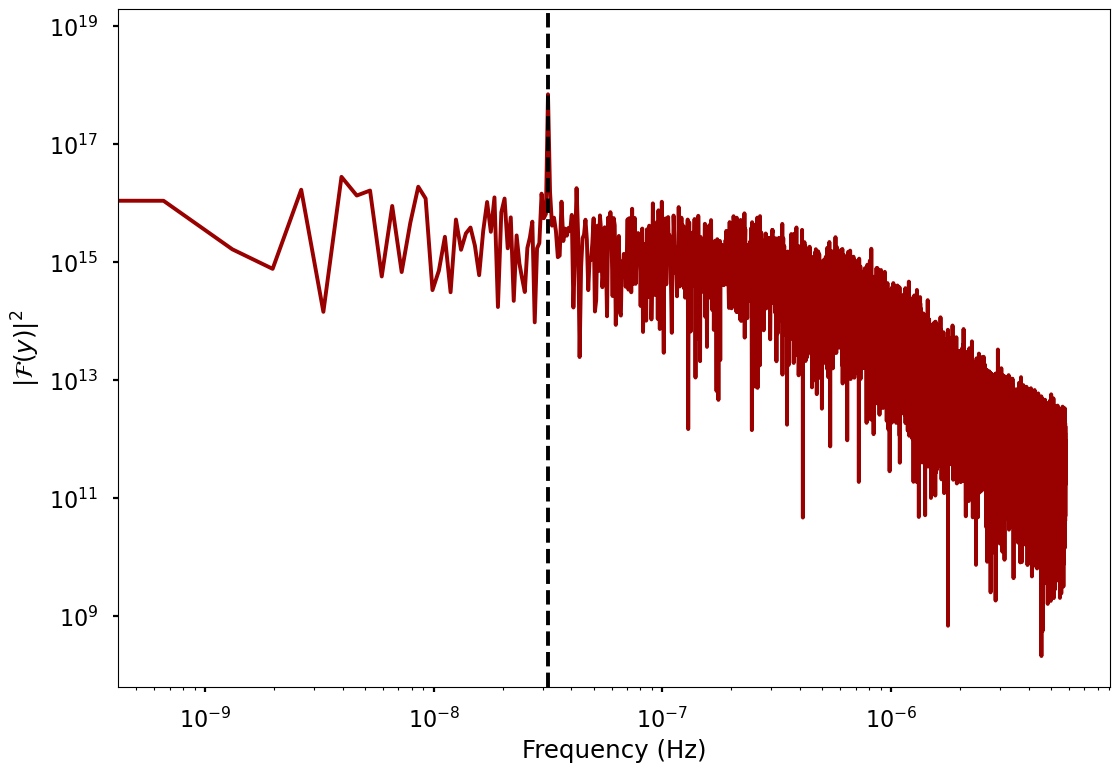

In [8]:
""" Plot the power spectrum of the data. """
# convert the times to seconds
time_seconds = (data['date'] - data['date'][0]).dt.total_seconds()

# get the power spectrum
freqs, cfm_power = power_spectrum(data['flow'], time_seconds)

# plot the power spectrum
fig, ax = plot_power_spectrum(freqs, cfm_power)

# plot a line at the annual frequency
year_seconds = 365.25*24*60*60
ax.axvline(1/year_seconds, color = '#000000', linestyle = '--')

plt.show()

/var/folders/0s/yp78v9d15qd8pmgtc3xknpfh37trx3/T/ipykernel_87419/3842981671.py:9: RuntimeWarning: divide by zero encountered in divide
  periods = 1/freqs * 1/(60*60*24*365.25)


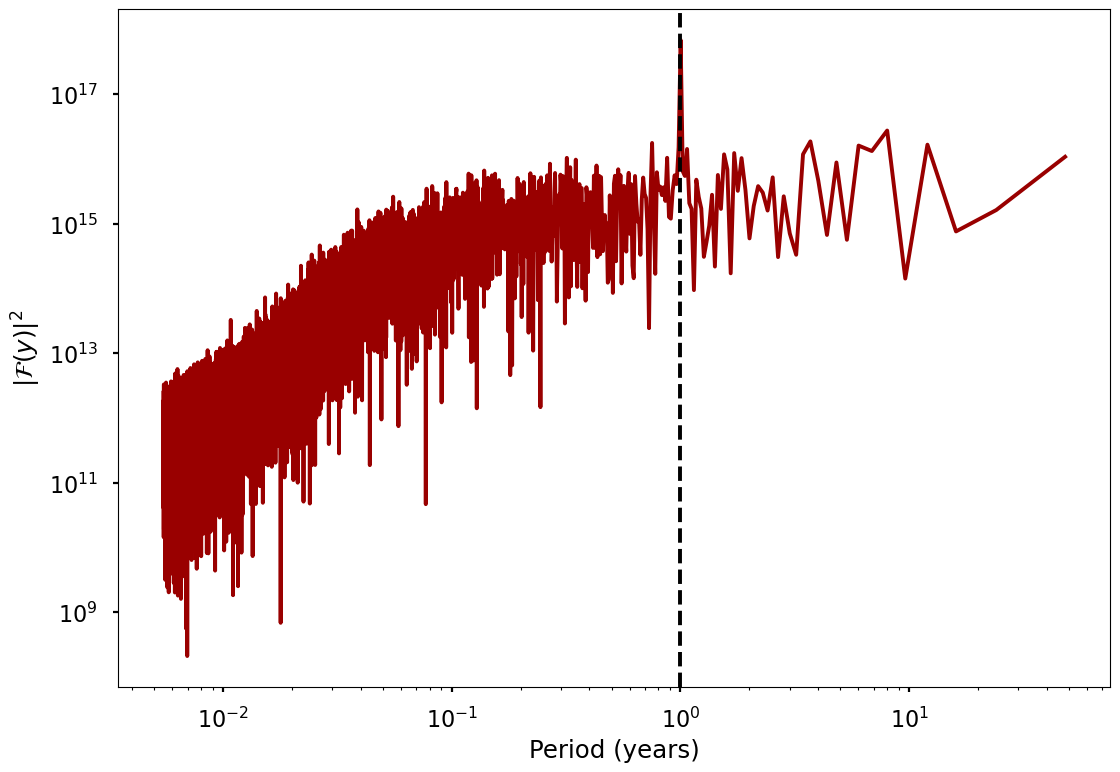

In [9]:
""" Plot the power spectrum of the data with the x-axis as period instead. """
# convert the times to seconds
time_seconds = (data['date'] - data['date'][0]).dt.total_seconds()

# get the power spectrum
freqs, cfm_power = power_spectrum(data['flow'], time_seconds)

# convert the frequencies to period (years)
periods = 1/freqs * 1/(60*60*24*365.25)

fig, ax = plt.subplots()

ax.plot(periods, cfm_power, color = '#990000')

# make the x-axis logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# add axis labels
ax.set_xlabel('Period (years)')
ax.set_ylabel('$|\mathcal{F}(y)|^2$')

# plot a line at the annual frequency
ax.axvline(1, color = '#000000', linestyle = '--')

plt.show()